In [1]:
%pylab inline

import sys
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [6]:
# reading in some sample images
fname1 = 'airplanes/airplanes_0001.jpg'
im_raw1 = plt.imread(fname1)
im_raw1.shape
fname2 = 'airplanes/airplanes_0002.jpg'
im_raw2 = plt.imread(fname2)
im_raw2.shape
# im_raw.astype(float)
#plt.imshow(im_raw,cm.gray)
print(im_raw1.shape,im_raw2.shape)

((164L, 398L, 3L), (184L, 401L, 3L))


In [35]:
import random
import numpy as np
randarray = np.random.random((164,398,3))
randarray2 = randarray[:82,:199,:]
print(randarray.shape,randarray2.shape)

((164L, 398L, 3L), (82L, 199L, 3L))


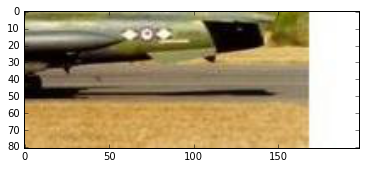

In [37]:
im1half1 = im_raw1[:82,:199,:]
im1half2 = im_raw1[83:,200:,:]

plt.imshow(im1half2)

In [28]:
def plot_spectrum(F, amplify=1000, ax=None):
    """Normalise, amplify and plot an amplitude spectrum."""
    # Compute the magnitude of the input F (call it mag).  Then, rescale mag by
    # amplify/maximum_of_mag.
    mag = abs(F) 
    mag *= amplify/mag.max() 
    
    # Next, clip all values larger than one to one.
    mag[mag > 1] = 1 

    if ax is None: ax = plt.gca()
    ax.imshow(mag, plt.cm.Blues)

def FFT2D(im_raw,keep_fraction=0.1,option='F'):
    # Assign the 2d FFT to `F`
    F = np.fft.fft2(im_raw)
    
    # Call ff a copy of the original transform. 
    ff = F.copy()

    # Set r and c to be the number of rows and columns of the array.
    # ....
    r,c,col = shape(im_raw)

    # Set to zero all rows with indices between r*keep_fraction and
    # r*(1-keep_fraction):
    F[r*keep_fraction:r*(1-keep_fraction),:] = 0

    # Similarly with the columns:
    F[:,c*keep_fraction:c*(1-keep_fraction)] = 0
    
    return eval(option)

def image_grid(im, F, im2, F2):
    """Display a grid with two images and their corresponding
    Fourier spectra.
    """
    fig, ax = plt.subplots(2, 2, figsize=(10,7))
    
    ax[0,0].set_title('Original image')
    ax[0,0].imshow(im, plt.cm.gray)
    
    ax[0,1].set_title('Fourier transform')
    plot_spectrum(F, ax=ax[0,1])
    
    ax[1,1].set_title('Filtered Spectrum')
    plot_spectrum(F2, ax=ax[1,1])
    
    ax[1,0].set_title('Reconstructed Image')
    ax[1,0].imshow(im2, plt.cm.gray)

In [26]:
#fname = 'D:/Dropbox/Prog/Py16/python-seminar/Homeworks/hw_0_data/moonlanding.png'
#im_raw = plt.imread(fname)
#im_raw.shape
#plt.imshow(im_raw,cm.gray)

D:\Anaconda2_40\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Anaconda2_40\lib\site-packages\ipykernel\__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


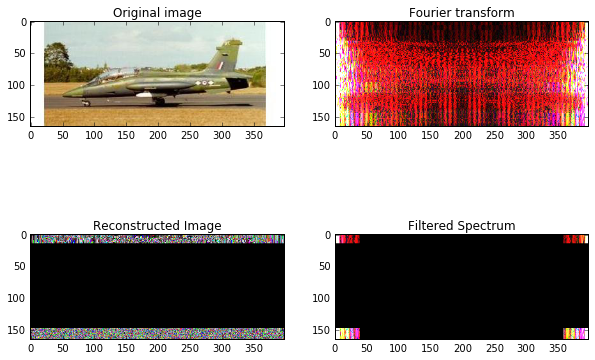

In [29]:
# im_new =   # new image here, from inverse FFT of truncated data
F = FFT2D(im_raw1)
ff = FFT2D(im_raw1,option='ff')
im_new = np.fft.ifft2(F)
# im_new = im_new.real

# call plotting routine here...
# imshow(im_new,cm.gray)
image_grid(im_raw1,ff.real,im_new.real,F.real)